# Machine Learning & Linear Regression from Scratch
<!-- > "...regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features')" -->

The work denoted in this notebook was motivated by need to refine understanding and bridging of an observed gap within the areas of machine learning and statistical / math aspect of my own understanding. Despite understanding the relationship between the two areas, there is still a sense of segmentation in understanding; thus, the need for work on concept integration.

This notebook involves a discussion / integration of concepts as well as commonly found terminology from machine learning, probability & statistics, multivariate calculus and linear algebra. 

## Why from Scratch?
A need for finer grain control, not knowing where to make the appropriate changes and a lack of understanding some fundamental concepts. The notion of __fitting__ a model given a set of a data points is quite familiar but how to do it is not often clear. Often times, the function to call for fitting a lines hides away important details for the sake of convenience. What is concerning is that these well-written packages can impede understanding of the science and math that formulates how a machine learns; thus, the need to peer behind the veil.

## Library Imports

In [63]:
# Import numpy for all mathematical operations and also generating our synthetic data
import numpy as np
# Matplotlib is going to be used for visualisations
import matplotlib.pyplot as plt
# plt.style.context("dark_background")

import pandas as pd

## References

### Math Terminology
- Dive into Deep Learning: https://d2l.ai/chapter_optimization/gd.html
    - Really good integration of Python ML frameworks + Math
- https://becominghuman.ai/univariate-linear-regression-clearly-explained-with-example-4164e83ca2ee
- https://brilliant.org/wiki/feature-vector/
- https://mathworld.wolfram.com/TensorRank.html
- https://brilliant.org/wiki/feature-vector/
- https://medium.com/swlh/the-math-of-machine-learning-i-gradient-descent-with-univariate-linear-regression-2afbfb556131
<!--  TODO: add integration of sensor modality -->
- https://en.wikipedia.org/wiki/Stimulus_modality 

### Code 
- https://d2l.ai/chapter_optimization/gd.html
- Batch, Mini-Batch, Stoch. SGD: https://towardsdatascience.com/batch-mini-batch-and-stochastic-gradient-descent-for-linear-regression-9fe4eefa637c
- https://d2l.ai/chapter_optimization/gd.html
- https://www.mldawn.com/linear-regression-from-scratch-using-numpy/



## A Model for Learning
A recreation of the model depicted in [Deep Learning for Coders with Fastai and PyTorch](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527) demonstrating the flow of information (data) and how a model can be formed.

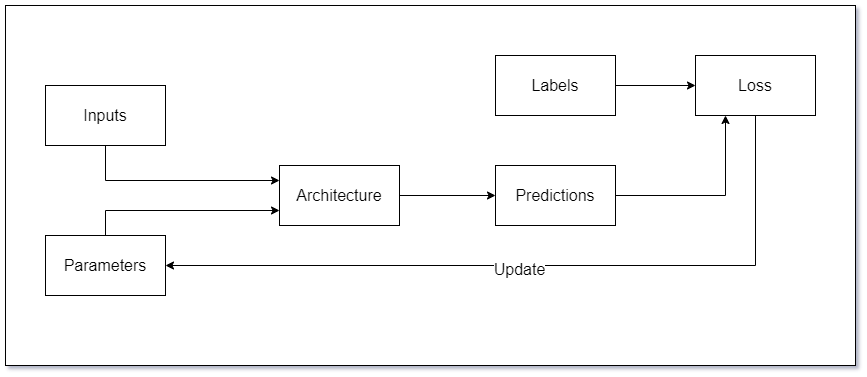

## Core Basic Concepts
Before diving into even regression, there is a need to do a bit of work exploring to establish terminology and tease apart the details for understanding of semantics in the space of data.

### Data Representation 
To bridge the gap of understanding, the __independent variable__ $X$ can thought of as a feature $x_d\mid d=1$ denoting a __single dimension__ and __axis__ - a collection of a single aspect observed with-respect-to (wrt) to $y$.
$$X=[x_1]\mid x_1=[x_1^1, x_1^2, ..., x_d^n]$$
- __NOTE__ In Jeremy Howard's book [Deep Learning for Coders with Fastai and PyTorch](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527) the notion of __dimension__ is pointed out as a potential area of confusion.


![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/JERsKXkW4T-screen-shot-2016-05-05-at-123118-pm.png?width=1200)

### Tensors
To stabilize such a notion of "dimensions" the notion of a __tensor__ and its __rank__ can be used. The rank $R$ of a tensor can be thought of as an __independent value__ denoting the number of __dimensions__ $N$ of the underlying space.

Thus, first we consider a __rank-0__ tensor (i.e., a __scalar__) which can be *represented* by $N^0=1$ number since scalars denote *quantities* with *magnitude* and *no direction*. In this case, there is no dimension to a scalar.  

To further generalize this idea, we can think of a __rank-1__ tensor (i.e., a __vector__) in $N$-dimensional space can be represented as $N^1=N$ numbers.

    
| rank | object | 
| --- | --- |
| 0 | scalar |
| 1 | vector | 
| 2 | N x N |
| >= 3 | tensor |
    

![](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-14-at-2.19.00-PM.png)
### Summary
To recap, we explored terminology used in forming the notion of __univariate__ problem represented by a rank-1 __independent variable__ $X$ and its relation ($\mathbb{R}\rightarrow\mathbb{R}$) to a __dependent variable__ $y$.

### Linear Regression
In this exploration of __linear regression__ we will be a exploring the __univariate__ case where in which we will observe a single __independent variable__ $X$ and a __dependent variable__ $y$ with a goal to estimate a __linear relationship__. Recalling the diagram from earlier, this is the __architecture__ aspect when considering the choice of a particular model. More specifically, architecture in this context is conceptualization of a mathematical function for modeling.
![](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

Where this fits in with the diagram of a system for learning -- for automating analysis

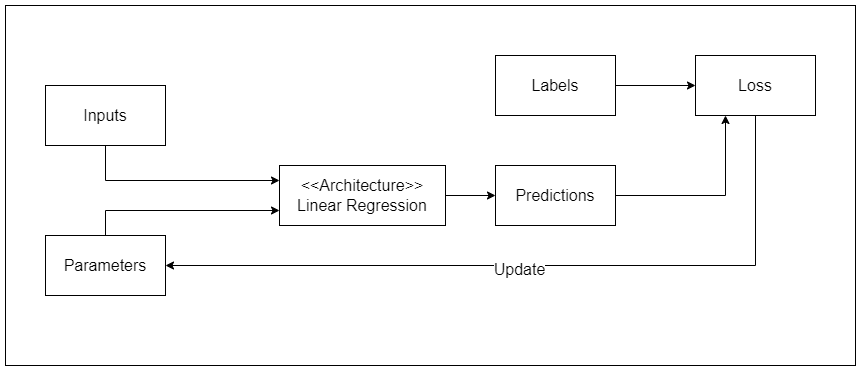

## Inputs
A stroll down memory lane of the classic __slope-intercept form__ denoting __univariate linear function__

$$
y=mx+b\rightarrow y=a_0 + a_1 x
$$

* $y$ is a __dependent variable__
* $x$ is an __independent variable__
* $a_0$ denotes the __intercept__
* $a_1$ denotes the linear regressions coefficient ie __slope__

Given this function, we have a general model for an infinitely long line -- a representation of a target where in which one can attempt to fit given various observations. This leverages a form of learning that is known to be __inductive__ when considering the context of reasong. Just as important, there is also __deductive reasoning__ which will not be explored in this notebook. 

Taking on the assumption of __inductive reasoning__ as a methodology -- a principle in which one can define a system for learning we can think of modeling as a __collection of observations__ from an arbitrary unknown process to be visualized and represented in $\mathbb{R^2}$ space.

<AxesSubplot:xlabel='x', ylabel='y'>

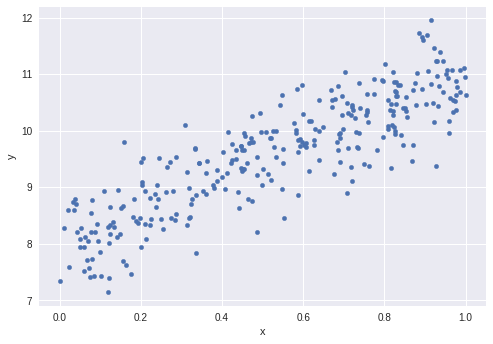

In [64]:
def generate_univar_data(n_samples, mu=0, sigma=0.1) -> pd.DataFrame:
    # The number of training data
    N = n_samples
    # 200 random samples as our data
    x_1 = np.random.rand(N)
    # Define the line slope and the Gaussian noise parameters
    slope = 3
    mu, sigma = mu,sigma # mean and standard deviation
    intercept = np.random.normal(mu, sigma, N)
    # Define the coordinates of the data points using the line equation and the added Gaussian noise 
    y = slope*x_1 + intercept
    return pd.DataFrame(
        {
            "x":x_1,
            "y": y
        }
    )

df = generate_univar_data(300, mu=8, sigma=0.5)
df.head()
df.plot(x="x", y="y", kind="scatter",grid=True)
    

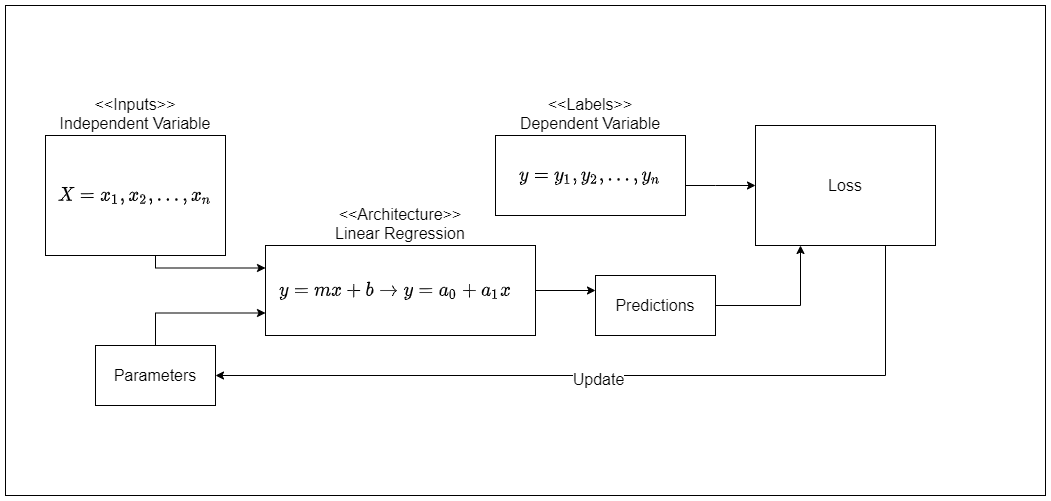

### Loss Functions
Given these concepts of input, a function to model there is a need for a __cost function__. The reason for a cost function is to denote the notion of distance -- a sense of how far the current model's forecast is off from the target. It can also be thought of as error wrt the to problem's idealized solution. 
The role of a cost function helps guide the search for the best possible values for $a_0,a_1$.

<!-- Thus given these represented by an underlying process that prepresents itself as what appears to be $y=mx + b$.  -->

There are many methods for defining representing cost / error.
### Mean Squared Error (MSE)
__Mean Squared Error__ will be used 
$$
\text{MSE}=\frac{1}{N}\sum^{N}_{i=1}({\hat{y}_i - y_i})^2
$$

- $\hat{y_i}$ represents the notion of a prediction 
- $y_i$ represents an observation defining what is a assumed to be ground-truth

### Root Mean Squared Error (RMSE)
$$
\text{RMSE}=\sqrt{\frac{1}{N}\sum^{N}_{i=1}({\hat{y}_i - y_i})^2}
$$
> "...error rate by the square root of MSE. RMSE is the most easily interpreted statistic, as it has the same units as the quantity plotted on the vertical axis or Y-axis.

- directly interprettable wrt measurement units
- generally a better fit than a correlation coefficient

Source: 
- https://www.i2tutorials.com/differences-between-mse-and-rmse/#:~:text=The%20MSE%20has%20the%20units,vertical%20axis%20or%20Y%2Daxis.

In [65]:
def mse(y_pred,y_truth):
    return np.sum((y_pred - y_truth)**2)

def rmse( y_hat, y_truth):
    return np.sqrt(mse(y_pred - y_truth) / len(x))
    

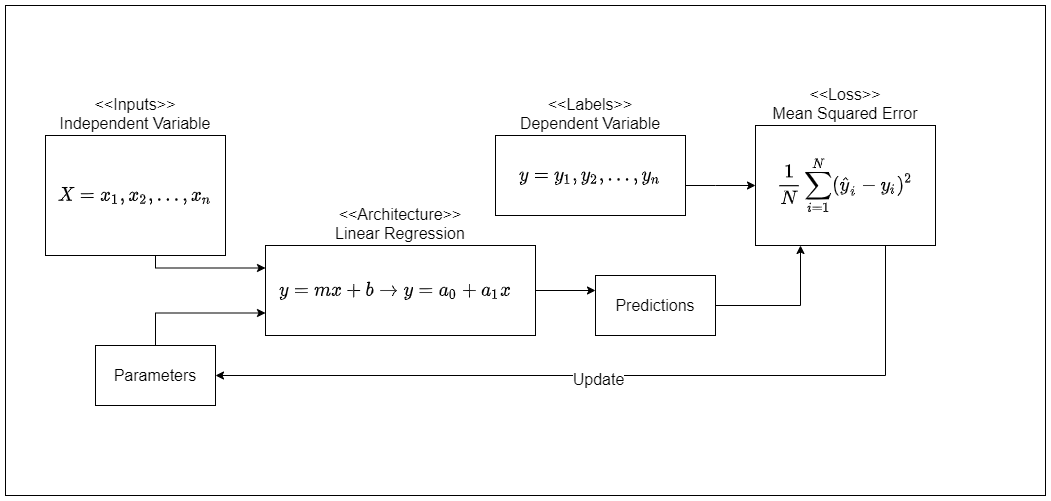

<!-- ## Evaluation Metric vs Loss Function
- __Loss Function__: something the model will minimize via training, __tightly coupled__ with the particualr model
    - Ex. log likelihood, negative log likelihood with penalty term(s) for log regression
- __Evaluation Metric__: is a definition of distance along the notion of __"how far are we away from the target?"__
    - > "...a function that gives a distance between each pair of point elements of a set. A set with a metric is called a metric space.[1] A metric induces a topology on a set, but not all topologies can be generated by a metric. A topological space whose topology can be described by a metric is called metrizable."
    - This is often usd when evluating the model on data not used in training such as __out-of-fold data__ or __test data__
    - Furthermore, this is also often used in __hyper parameter tuning__ (more on this later when exploring neural networks)
    
## Remarks
IDGI, it still sounds like the same thing... is this just more MLDS lingo...? or is eval metric definition of a quantifiable target definining representation of an aspect of an observed process that should be factored in when training and evaluating a model as it performs SGD according to some loss function....

- https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7
- Metric: https://en.wikipedia.org/wiki/Metric_(mathematics)
- More on Metrics: https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/ -->

https://www.mldawn.com/linear-regression-from-scratch-using-numpy/
https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2
http://primo.ai/index.php?title=Objective_vs._Cost_vs._Loss_vs._Error_Function

## Gradient Descent
### Computing the Gradient
A a great review can be at: https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction

At the core of "fitting" or "learning", adjustments are made to observe how the loss function changes wrt an input variable

$$
\begin{align}
\frac{dE}{dy_{hat}}=y_{hat}-y,  &\text{ derivative of error wrt prediction}\\
\frac{dy_{hat}}{dZ}=1, &\text{ derivative of }y_{hat} \text{ wrt } Z\\
\frac{dZ}{dw_1}=x_1, \frac{Z}{dw_{0}}=x_0=1,&\text{ derivative of } Z \text{ wrt } w_0 \text{ and } w_1\\
\frac{dE}{dw_1}=\frac{dE}{dy_{hat}}\times\frac{dy_{hat}}{dZ}\times\frac{dZ}{dw_1}, &\text{ computing the gradient of the error function using Chain Rule}\\
\frac{dE}{dw_1}=-(y-y_{hat})\times 1 \times x_1 = -(y-y_{hat})\times x_1\\
\frac{dE}{dw_0}=-(y-y_{hat})\times 1 \times x_0 = -(y-y_{hat})
\end{align}
$$

In [66]:
## Polynomial Regression

In [67]:
## Logistics Regression

In [68]:
# plt.plot(E, 'r')
# plt.grid()
# plt.title("Error")
# plt.xlabel("Epochs")
# plt.ylabel("SSE")
# plt.show()

# Sum of Square Error Linear Regression System Design



## Diagram
![](linear-regression-diagram.jpg)


## Entire Code
- https://www.mldawn.com/linear-regression-from-scratch-using-numpy/

### Loss Function & Analytical Gradient

In [69]:
import numpy as np
import matplotlib.pyplot as plt
def SSE(y, y_hat):
    """Sum of Square Error
    Source: https://en.wikipedia.org/wiki/Residual_sum_of_squares
    
    Why do we include `0.5`?
        - https://datascience.stackexchange.com/questions/52157/why-do-we-have-to-divide-by-2-in-the-ml-squared-error-cost-function
    """
    return 0.50*np.sum((y - y_hat)**2)

def Linear(Z):
    return Z

def dEdW_1 (y, y_hat,x_1):
    """Gradient denoting the Slope"""
    return np.sum(-(y - y_hat) * x_1)

def dEdW_0 (y, y_hat):
    """Gradient of Bias Unit"""
    return np.sum(-(y - y_hat))

### Generate Synthetic Data

In [70]:
N = 200
slope = 3
mu, sigma = 0, 0.1 # mean and standard deviation
intercept = np.random.normal(mu, sigma, N)
x_1 = np.random.rand(N)
y = slope*x_1 + intercept
len(x_1.shape), len(y.shape) 

(1, 1)

### Visualization Boilerplate

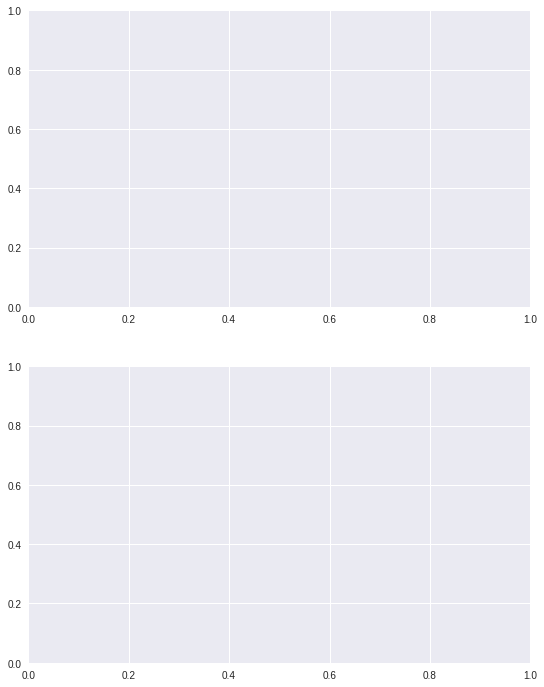

In [71]:
from IPython.display import display, clear_output

%matplotlib inline 
plt.style.use("seaborn")
# 
fig = plt.figure()
fig.set_size_inches(9,12)
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

### Perform Naive Gradient Descent
The following performs a naive gradient descent for 300 training epochs where in which a batch size of 200 is used. 

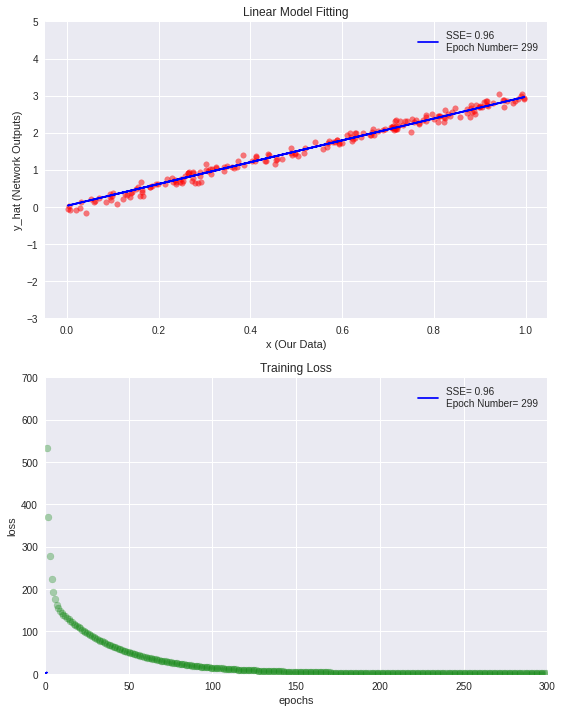

In [72]:
# TODO: don't believe this considers batch_size - a follow up to extend this walk thru is, how does
# batch size affect minization of loss or how well the line fits? i've been told that a smaller
# batch size results in slow training which in general is true; however, it is still the same
# because a model evenutally becomes saturated or is at a point where there is enough information caputred
# suhc that fine tuning is necesary. wrt to slr, that is not absolutely necessary...?
area = np.pi * 10

# init starting regression line
w_1 = np.random.uniform(-2, -3, 1)
w_0 = np.random.uniform(0, 2, 1)
x_0 = 1
y_hat = w_1 * x_1 + w_0 * x_0  # m*x + b

epoch = 300
eta = 0.001  # this is learning rate
E = []
Zs = []
preds = []
eps = []
for ep in range(epoch):
    Z = w_1 * x_1 + w_0 * x_0  # TODO: believe the "batch_size" in this case is 200...?
    y_hat = Linear(Z)
    error = SSE(y, y_hat)

    E.append(error)  # NOTE: error is collected for visual pu
    preds.append(y_hat)
    Zs.append(Z)
    eps.append(ep)
    # compute the derivative of error wrt to x for an update
    dEdw_1 = dEdW_1(y, y_hat, x_1)
    dEdw_0 = dEdW_0(y, y_hat)
    # apply the update found from analytically computing the gradient?
    w_1 = w_1 - eta * dEdw_1
    w_0 = w_0 - eta * dEdw_0
    if ep % 1 == 0:
        ax.clear()
        ax1.clear()
        # plot linear model fitting and predictions
        ax.scatter(
            x_1, y, s=area, c="r", alpha=0.5
        )  # these are kept constant in the viusal
        # TODO: add a_0, a_1 -- bias and slope
        ax.plot(
            x_1,
            y_hat,
            "-b",
            label="SSE= %.2f" % error + "\n" + "Epoch Number= %d" % (ep),
        )
        ax.set_xlabel("x (Our Data)")
        ax.set_ylabel("y_hat (Network Outputs)")
        ax.legend()
        ax.set_title("Linear Model Fitting")
        ax.set_ylim(-3, 5)
        ax.grid(True)

        ax1.scatter(eps, E, c="g", alpha=0.30)
        ax1.plot(
            x_1,
            y_hat,
            "-b",
            label="SSE= %.2f" % error + "\n" + "Epoch Number= %d" % (ep),
        )
        ax1.set_xlabel("epochs")
        ax1.set_ylabel("loss")
        ax1.set_title("Training Loss")
        ax1.set_xlim(0, 300)
        ax1.set_ylim(0, 700)
        ax1.legend()
        ax1.grid(True)

        clear_output(wait=True)
        display(fig)
    if ep == 299:
        ax1.plot(E, "r")

## Follow-Up Questions
- How do we find the elbow of the loss curve plot? 
- It is known that we can gurantee convergence of loss by modulating the lr, what does that look like?
- Can we visualize the __residuals__?
- 


In [73]:
# potneitally.../ lleverageing idea of minimizing residual>..?
# least square method...?
# there exists 2 methods.../ per josh  MLE or Leaset Sqaured
# MLE...? possibly/??? using 2 MLE..?
# y _hat, y_pred y_new, y_(i+1) | i \in N denoting 
# number of samples/ instances
# is this grad descent, idk... 
# maybe...? multivariate.... 